In [2]:
import mfpy
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.lines import Line2D

### Fx pure

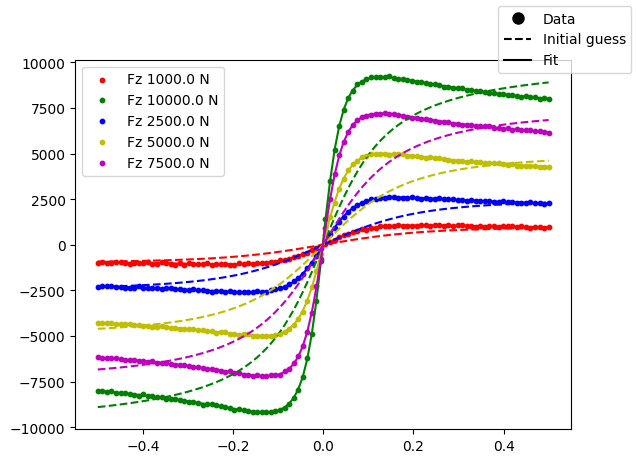

In [3]:
Fx_pure_folder = r'samples\fit\Fx_pure'#Folder that contains the .csv files in the good. For more details check the MFPy_/fit.py or read the readme.md



'''Calling the fit function for the Fx_Pure. The user can chose if he wants to inputs his own initial guess for the fitting process, the nominal force and 
the desired output. For initial_guess = None, the function will use a pre-built initial guess. For Fz_nom = None, the function will use the median of the
Fz forces in the .csv file.
For the output types, with full_output is None, the output will be only the fittted coefficients (p_fit) and the Fx_fitted. For a complete output, the user can
can use the full_output = 2.
'''

p_fit,initial_guess,Fz_nom,Fz_data,Fx_data,kappa_data,Fx_initial,Fx_fit = mfpy.Fit.Fx_pure(Fx_pure_folder,initial_guess = None,Fz_nom=None,full_output=2)


#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fz_data)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],Fx_initial[i],'--',color=color)
    ax.scatter(kappa_data[i],Fx_data[i],s=10,color=color,label='Fz {} N'.format(Fz_data[i]))
    ax.plot(kappa_data[i],Fx_fit[i],'-',color=color)
ax.legend()
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')

### Fy pure cornering

In [4]:
Fy_pure_folder = r'samples\fit\Fy_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md

p_fit_Fy0,p_init,Fz_nom = mfpy.Fit.Fy_pure(Fy_pure_folder,initial_guess=None,Fz_nom=None,full_output=1)

print(p_fit_Fy0)

[ 1.50075106e+00  9.00134278e-01 -6.04570126e-02 -3.38154290e-03
 -8.02868976e-01 -5.94511434e-01  9.81774078e-02 -6.94973299e+00
 -2.64403780e-01 -1.50047733e+01  1.70443663e+00  4.01248092e-01
  2.00273155e+00 -4.19501827e-02 -9.05469332e-01 -1.96238172e-01
 -1.94844585e-03  2.92158451e-03 -5.90810407e-03  3.97733290e-02
 -2.00270516e-01 -4.99649444e-01]


### Mz pure cornering

In [5]:
#Fitting Mz pure

Mz_pure_folder = r'samples\fit\Mz_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
R0 = 0.3015 #Unloaded radius in m (necessary parameter)
p_fit_Mz0,p_init,Fz_nom = mfpy.Fit.Mz_pure(Mz_pure_folder,R0,p_fit_Fy0,Fz_nom=None,full_output=1) #The Mz_folder needs the p_fit_Fy_pure
print(p_fit_Mz0)

[ 1.20195909e+01 -1.37595866e+00  3.32714362e-02  2.02547033e-01
 -1.52924727e-01 -5.81254056e-02  4.73315556e-03  1.30276515e+00
  9.32077919e-02 -5.65457618e-03  4.00757400e-01 -7.18635270e-03
  2.10540144e-03 -2.01391206e-03 -1.56204865e-01  9.32724175e-03
 -1.87149113e-04 -7.74967349e-05 -1.75006570e+00  7.95864125e-01
  4.52995064e-02  3.06623560e-01 -7.20439528e-01  1.52012645e-03
  2.40131775e-03  2.50311967e-01 -2.00150531e-01]
